# PIK3CA: Effects of mutation in the hotspot compared to other mutations

In [1]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [2]:
somatic = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
gene = 'PIK3CA'
protein = 'PIK3CA'

In [3]:
print(somatic.loc[(somatic['Gene'] == gene)])

      Patient_Id    Gene           Mutation        Location  \
160    C3L-00006  PIK3CA  Missense_Mutation         p.E545K   
1147   C3L-00032  PIK3CA  Missense_Mutation         p.E545K   
1426   C3L-00139  PIK3CA  Missense_Mutation         p.Q546P   
1574   C3L-00143  PIK3CA  Missense_Mutation         p.R115L   
2260   C3L-00156  PIK3CA  Missense_Mutation         p.L628R   
2261   C3L-00156  PIK3CA  Missense_Mutation        p.T1025A   
3417   C3L-00161  PIK3CA  Missense_Mutation          p.R38C   
3418   C3L-00161  PIK3CA  Missense_Mutation         p.V344M   
4648   C3L-00362  PIK3CA  Missense_Mutation        p.H1047R   
4756   C3L-00563  PIK3CA  Missense_Mutation         p.G118D   
4757   C3L-00563  PIK3CA  Missense_Mutation         p.E545V   
7216   C3L-00586  PIK3CA  Missense_Mutation          p.F83S   
7217   C3L-00586  PIK3CA  Missense_Mutation          p.R88Q   
7218   C3L-00586  PIK3CA  Missense_Mutation         p.K111N   
7219   C3L-00586  PIK3CA  Missense_Mutation        p.Y1

In [4]:
#A list of mutations present in the hotspot according to our Hotspot3D output
hotspot_mutations = ['p.E545A', 'p.E545K', 'p.E545V', 'p.Q546P', 'p.Q546R', 'p.E542K']
mutated_hotspot = somatic.loc[(somatic['Location'].isin(hotspot_mutations)) & (somatic['Gene'] == gene)]
hotspot_patients = mutated_hotspot['Clinical_Patient_Key']

In [5]:
mutated_hotspot.head(20)

,Patient_Id,Gene,Mutation,Location,Clinical_Patient_Key
160,C3L-00006,PIK3CA,Missense_Mutation,p.E545K,S001
1147,C3L-00032,PIK3CA,Missense_Mutation,p.E545K,S003
1426,C3L-00139,PIK3CA,Missense_Mutation,p.Q546P,S009
4757,C3L-00563,PIK3CA,Missense_Mutation,p.E545V,S021
16613,C3L-00601,PIK3CA,Missense_Mutation,p.E545K,S023
19188,C3L-00605,PIK3CA,Missense_Mutation,p.E545K,S024
21386,C3L-00918,PIK3CA,Missense_Mutation,p.E545A,S032
21643,C3L-00921,PIK3CA,Missense_Mutation,p.E542K,S033
22656,C3L-00947,PIK3CA,Missense_Mutation,p.E545K,S038
37618,C3N-00321,PIK3CA,Missense_Mutation,p.E542K,S061


In [6]:
print(len(mutated_hotspot))

19


# Proteomic Abundance

In [7]:
p10_mutations = CPTAC.compare_mutations(proteomics, protein, gene)
#print(p10_mutations)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)
print(p10_mutations)

        PIK3CA           Mutation Patient_Type Within_Hotspot
S001 -0.450000  Missense_Mutation        Tumor           True
S002 -0.215000           Wildtype        Tumor       Wildtype
S003 -0.178000  Missense_Mutation        Tumor           True
S004  0.470000           Wildtype        Tumor       Wildtype
S005 -0.392000           Wildtype        Tumor       Wildtype
S006  0.287000           Wildtype        Tumor       Wildtype
S007 -0.349000           Wildtype        Tumor       Wildtype
S008 -0.317000           Wildtype        Tumor       Wildtype
S009  0.282000  Missense_Mutation        Tumor           True
S010 -0.071400  Missense_Mutation        Tumor          False
S011 -0.064000           Wildtype        Tumor       Wildtype
S012 -0.743000  Missense_Mutation        Tumor          False
S013 -0.555000           Wildtype        Tumor       Wildtype
S014 -0.274000  Missense_Mutation        Tumor          False
S015  0.203000           Wildtype        Tumor       Wildtype
S016  0.

## Patients with mutation and patients with mutation in the hotspot

In [8]:
print(len(p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']))
print(len(p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]))

48
19


In [9]:
#Build the protein list; this may have only a single protein if desired
protList = ['IRS1', 'IRS2', 'RRAS', 'AKT2', 'NRAS', 'PTEN', 'AKT1', 'MRAS', 'HRAS', 'RPS6KB1', 'PIK3R1', 'PKC', 'MTOR', 'S6K', 'MAPK', 'ERBB3', 'P85A', 'P55G', 'CDK5']

## Hotspot mutation vs non-hotspot mutation

In [10]:
in_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
out_hotspot = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
ttest = scipy.stats.ttest_ind(in_hotspot[protein], out_hotspot[protein])
print(ttest)

Ttest_indResult(statistic=-1.2286446586536528, pvalue=0.22545390476387955)


## Hotspot mutation vs other mutations and wildtype

In [11]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.270602549581191, pvalue=0.025359967628122704)


## All mutations vs wildtype

In [12]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.5594983911383546, pvalue=0.012010830576504043)


## Hotspot mutation v wildtype

In [13]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
print(ttest)

Ttest_indResult(statistic=-2.705132201045789, pvalue=0.008593903345120646)


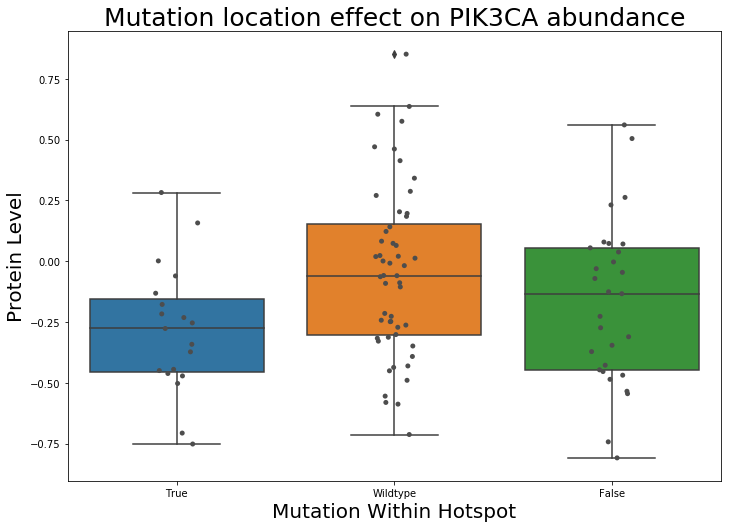

In [14]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = protein, jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on PIK3CA abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()

# Phosphoproteomic Abundance

In [15]:
p10_mutations = CPTAC.compare_mutations(phos, protein, gene)
p10_mutations['Within_Hotspot'] = False
p10_mutations.loc[hotspot_patients, 'Within_Hotspot'] = True
p10_mutations.loc[p10_mutations['Mutation'] == 'Wildtype', 'Within_Hotspot'] = 'Wildtype'
p10_mutations = p10_mutations.loc[p10_mutations['Patient_Type'] == 'Tumor'].dropna(axis=0)

## Hotspot mutation vs non-hotspot mutation

In [16]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == False]
phos_sites = ['PIK3CA-S312', 'PIK3CA-T313']
for site in phos_sites:
    ttest = scipy.stats.ttest_ind(mutated[site], wt[site])
    print(site, ttest)

PIK3CA-S312 Ttest_indResult(statistic=0.07815573255799868, pvalue=0.9392459295130927)
PIK3CA-T313 Ttest_indResult(statistic=-0.720724676771127, pvalue=0.48758503533671316)


## Hotspot mutation vs other mutations and wildtype

In [17]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] != True]
phos_sites = ['PIK3CA-S312', 'PIK3CA-T313']
for site in phos_sites:
    ttest = scipy.stats.ttest_ind(mutated[site], wt[site])
    print(ttest)

Ttest_indResult(statistic=-0.27882169992913575, pvalue=0.7831089209315338)
Ttest_indResult(statistic=-1.2268996671628933, pvalue=0.2334383823483017)


## All mutations vs wildtype

In [18]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] != 'Wildtype']
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
for site in phos_sites:
    ttest = scipy.stats.ttest_ind(mutated[site], wt[site])
    print(ttest)

Ttest_indResult(statistic=-0.9282926192158756, pvalue=0.36380352488297274)
Ttest_indResult(statistic=-1.1309017893812934, pvalue=0.27084703295497276)


## Hotspot mutation v wildtype

In [19]:
mutated = p10_mutations.loc[p10_mutations['Within_Hotspot'] == True]
wt = p10_mutations.loc[p10_mutations['Within_Hotspot'] == 'Wildtype']
for site in phos_sites:
    ttest = scipy.stats.ttest_ind(mutated[site], wt[site])
    print(ttest)

Ttest_indResult(statistic=-0.48548827504596204, pvalue=0.6360731985694147)
Ttest_indResult(statistic=-1.316863225403985, pvalue=0.21247893070988005)


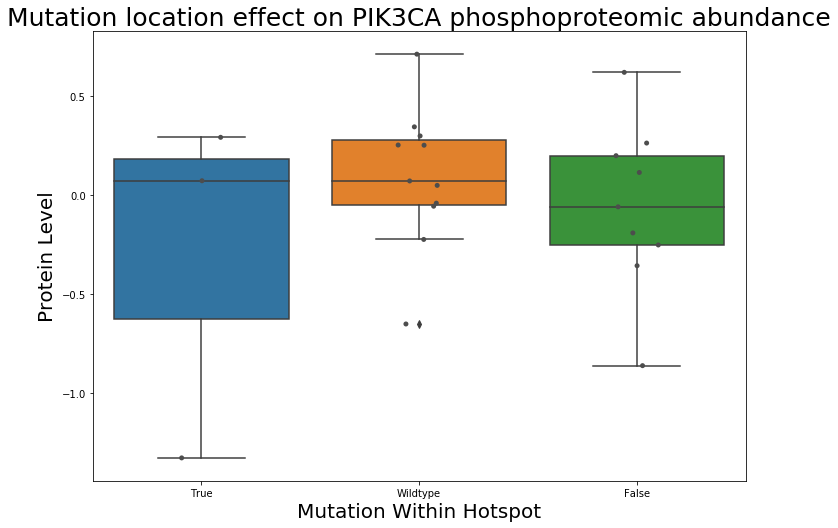

In [20]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = p10_mutations, x = 'Within_Hotspot', y = 'PIK3CA-T313', ax = ax)
boxplt = sns.stripplot(data = p10_mutations, x = 'Within_Hotspot', y = 'PIK3CA-T313', jitter = True, color = '.3')
boxplt.set_title('Mutation location effect on PIK3CA phosphoproteomic abundance', fontsize='25')
boxplt.set_xlabel('Mutation Within Hotspot', fontsize='20')
boxplt.set_ylabel('Protein Level', fontsize='20')
plt.show()